In [43]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from turtle import color
from sklearn.linear_model import LinearRegression


**Entire home**

In [44]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('Roma Entire home_apt.csv')
df.head()

id                                               name  \
0   3079.0          Cozy apartment  (2-4)with Colisseum  view   
1  12398.0                Casa Donatello - Home far from Home   
2  19965.0   S.Peter's Basilica 5 MIN WALK two large bedrooms   
3  50333.0  Bright&Cosy Penthouse Overlooking St. Peter's ...   
4  50471.0                     Cozy bright Loft in Trastevere   

                                         description  \
0  With the view of the Colisseum from the front ...   
1  Casa Donatello is a newly renovated two-bedroo...   
2  Bright and quiet two bedrooms apartment 3rd fl...   
3  Very bright and comfortable, impressive views ...   
4  Little loft in Trastevere is a charming studio...   

                               neighborhood_overview  host_id  \
0  Monti neighborhood is one of the best areas in...     3504   
1  You are at 15 minutes walking distance from hi...    11756   
2  Prati is a famous neighbourhood (rione of Rome...    75450   
3  There are plenty of shops nearby, small restau...   230736   
4  Trastevere Lovely and bright Loft is 35 mq, it...   231637   

         host_name  host_since host_location  host_response_time  \
0            Laura  08/10/2008   Rome, Italy  within a few hours   
1              Gea  30/03/2009   Rome, Italy      within an hour   
2             Sasa  30/01/2010   Rome, Italy      within an hour   
3  Sita Alessandra  10/09/2010   Rome, Italy      within an hour   
4          Lavinia  11/09/2010   Rome, Italy      within an hour   

  host_response_rate  ... neighbourhood_cleansed.1  \
0               100%  ...         I Centro Storico   
1               100%  ...        VIII Appia Antica   
2               100%  ...         I Centro Storico   
3               100%  ...         I Centro Storico   
4               100%  ...     II Parioli/Nomentano   

                     property_type.1      room_type.1  bathrooms_text.1  \
0  Private room in bed and breakfast     Private room    1 private bath   
1                       Private room     Private room         1.5 baths   
2                 Entire rental unit  Entire home/apt            1 bath   
3                 Entire rental unit  Entire home/apt            1 bath   
4                 Entire rental unit  Entire home/apt            1 bath   

                                         amenities.1 has_availability  \
0  ["Air conditioning", "Safe", "Crib", "Cleaning...                t   
1  ["Air conditioning", "Wine glasses", "Dining t...                t   
2  ["Dedicated workspace", "Ethernet connection",...                t   
3  ["Air conditioning", "Crib", "Wine glasses", "...                t   
4  ["Crib", "Wine glasses", "Dining table", "Dedi...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  \
0                t                         54                    5.00   
1                f                          7                    4.60   
2                f                         11                    4.38   
3                f                          2                    4.86   
4                f                          2                    4.89   

  host_is_superhost  
0                 f  
1                 f  
2                 t  
3                 f  
4                 f  

[5 rows x 66 columns]

**price vs host_acceptance rate**

In [45]:
df['price'] = df['price'].fillna('0').astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


In [46]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [47]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Vars_Dep)
model.score(Vars_Indep,Vars_Dep)

0.0012439781590358745

In [48]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_acceptance_rate', y_pred)
df.head()

Predicciones_host_acceptance_rate       id  \
0                         155.850469   3079.0   
1                         220.091048  12398.0   
2                         224.978918  19965.0   
3                         222.884117  50333.0   
4                         225.677185  50471.0   

                                                name  \
0          Cozy apartment  (2-4)with Colisseum  view   
1                Casa Donatello - Home far from Home   
2   S.Peter's Basilica 5 MIN WALK two large bedrooms   
3  Bright&Cosy Penthouse Overlooking St. Peter's ...   
4                     Cozy bright Loft in Trastevere   

                                         description  \
0  With the view of the Colisseum from the front ...   
1  Casa Donatello is a newly renovated two-bedroo...   
2  Bright and quiet two bedrooms apartment 3rd fl...   
3  Very bright and comfortable, impressive views ...   
4  Little loft in Trastevere is a charming studio...   

                               neighborhood_overview  host_id  \
0  Monti neighborhood is one of the best areas in...     3504   
1  You are at 15 minutes walking distance from hi...    11756   
2  Prati is a famous neighbourhood (rione of Rome...    75450   
3  There are plenty of shops nearby, small restau...   230736   
4  Trastevere Lovely and bright Loft is 35 mq, it...   231637   

         host_name  host_since host_location  host_response_time  ...  \
0            Laura  08/10/2008   Rome, Italy  within a few hours  ...   
1              Gea  30/03/2009   Rome, Italy      within an hour  ...   
2             Sasa  30/01/2010   Rome, Italy      within an hour  ...   
3  Sita Alessandra  10/09/2010   Rome, Italy      within an hour  ...   
4          Lavinia  11/09/2010   Rome, Italy      within an hour  ...   

  neighbourhood_cleansed.1                    property_type.1  \
0         I Centro Storico  Private room in bed and breakfast   
1        VIII Appia Antica                       Private room   
2         I Centro Storico                 Entire rental unit   
3         I Centro Storico                 Entire rental unit   
4     II Parioli/Nomentano                 Entire rental unit   

       room_type.1 bathrooms_text.1  \
0     Private room   1 private bath   
1     Private room        1.5 baths   
2  Entire home/apt           1 bath   
3  Entire home/apt           1 bath   
4  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Air conditioning", "Safe", "Crib", "Cleaning...                 t   
1  ["Air conditioning", "Wine glasses", "Dining t...                 t   
2  ["Dedicated workspace", "Ethernet connection",...                 t   
3  ["Air conditioning", "Crib", "Wine glasses", "...                 t   
4  ["Crib", "Wine glasses", "Dining table", "Dedi...                 t   

  instant_bookable host_total_listings_count  review_scores_accuracy  \
0                t                        54                    5.00   
1                f                         7                    4.60   
2                f                        11                    4.38   
3                f                         2                    4.86   
4                f                         2                    4.89   

   host_is_superhost  
0                  f  
1                  f  
2                  t  
3                  f  
4                  f  

[5 rows x 67 columns]

In [49]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_host_acceptance_rate', color="red", data=df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [50]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.0012439781590358745
Correlación: 0.035270074553874625


**price vs host_is_superhost**

C:\Users\diego\AppData\Local\Temp\ipykernel_9020\1597296358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')


<Axes: xlabel='host_is_superhost', ylabel='price'>

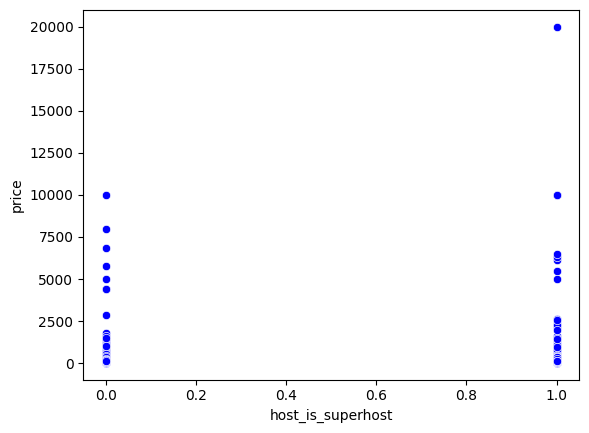

In [51]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [52]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model2 = LinearRegression()
model2.fit(X=Vars_Indep, y=Vars_Dep)
model2.score(Vars_Indep,Vars_Dep)

0.00035991302842142137

In [53]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model2.predict(X=df[['host_is_superhost']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_is_superhost', y_pred)
df.head()

Predicciones_host_is_superhost  Predicciones_host_acceptance_rate       id  \
0                      208.158664                         155.850469   3079.0   
1                      208.158664                         220.091048  12398.0   
2                      226.829778                         224.978918  19965.0   
3                      208.158664                         222.884117  50333.0   
4                      208.158664                         225.677185  50471.0   

                                                name  \
0          Cozy apartment  (2-4)with Colisseum  view   
1                Casa Donatello - Home far from Home   
2   S.Peter's Basilica 5 MIN WALK two large bedrooms   
3  Bright&Cosy Penthouse Overlooking St. Peter's ...   
4                     Cozy bright Loft in Trastevere   

                                         description  \
0  With the view of the Colisseum from the front ...   
1  Casa Donatello is a newly renovated two-bedroo...   
2  Bright and quiet two bedrooms apartment 3rd fl...   
3  Very bright and comfortable, impressive views ...   
4  Little loft in Trastevere is a charming studio...   

                               neighborhood_overview  host_id  \
0  Monti neighborhood is one of the best areas in...     3504   
1  You are at 15 minutes walking distance from hi...    11756   
2  Prati is a famous neighbourhood (rione of Rome...    75450   
3  There are plenty of shops nearby, small restau...   230736   
4  Trastevere Lovely and bright Loft is 35 mq, it...   231637   

         host_name  host_since host_location  ... neighbourhood_cleansed.1  \
0            Laura  08/10/2008   Rome, Italy  ...         I Centro Storico   
1              Gea  30/03/2009   Rome, Italy  ...        VIII Appia Antica   
2             Sasa  30/01/2010   Rome, Italy  ...         I Centro Storico   
3  Sita Alessandra  10/09/2010   Rome, Italy  ...         I Centro Storico   
4          Lavinia  11/09/2010   Rome, Italy  ...     II Parioli/Nomentano   

                     property_type.1      room_type.1 bathrooms_text.1  \
0  Private room in bed and breakfast     Private room   1 private bath   
1                       Private room     Private room        1.5 baths   
2                 Entire rental unit  Entire home/apt           1 bath   
3                 Entire rental unit  Entire home/apt           1 bath   
4                 Entire rental unit  Entire home/apt           1 bath   

                                         amenities.1  has_availability  \
0  ["Air conditioning", "Safe", "Crib", "Cleaning...                 t   
1  ["Air conditioning", "Wine glasses", "Dining t...                 t   
2  ["Dedicated workspace", "Ethernet connection",...                 t   
3  ["Air conditioning", "Crib", "Wine glasses", "...                 t   
4  ["Crib", "Wine glasses", "Dining table", "Dedi...                 t   

   instant_bookable host_total_listings_count review_scores_accuracy  \
0                 t                        54                   5.00   
1                 f                         7                   4.60   
2                 f                        11                   4.38   
3                 f                         2                   4.86   
4                 f                         2                   4.89   

   host_is_superhost  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 68 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

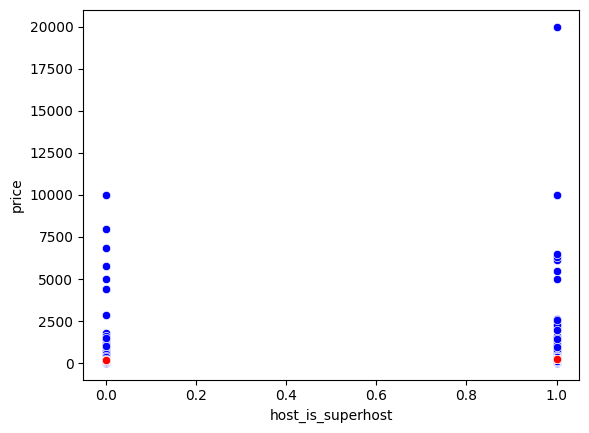

In [54]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_host_is_superhost', color="red", data=df)

In [55]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model2.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.00035991302842142137
Correlación: 0.018971373920236283


**accommodates vs bathrooms**


<Axes: xlabel='bathrooms', ylabel='accommodates'>

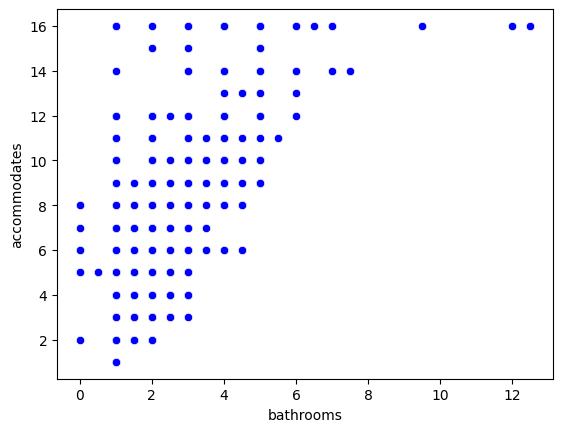

In [56]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [57]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['accommodates']
model3 = LinearRegression()
model3.fit(X=Vars_Indep, y=Vars_Dep)
model3.score(Vars_Indep,Vars_Dep)

0.4167027702722874

In [58]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model3.predict(X=df[['bathrooms']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_bathrooms', y_pred)

In [59]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms', color="red", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

In [60]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model3.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.4167027702722874
Correlación: 0.6455251894947922


**price vs review_scores_cleanliness**


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

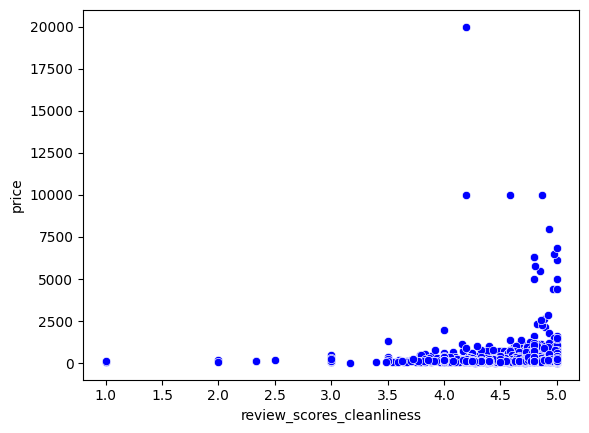

In [61]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [62]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model4 = LinearRegression()
model4.fit(X=Vars_Indep, y=Vars_Dep)
model4.score(Vars_Indep,Vars_Dep)

1.6003618349413884e-05

In [63]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model4.predict(X=df[['review_scores_cleanliness']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_review_scores_cleanliness', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

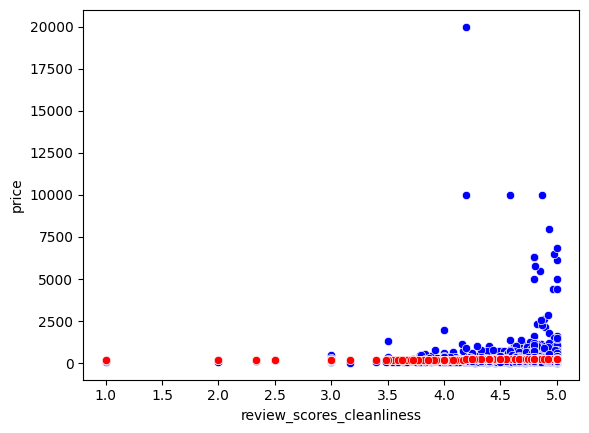

In [64]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_review_scores_cleanliness', color="red", data=df)

In [65]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model4.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 1.6003618349413884e-05
Correlación: 0.00400045226810843


**price vs host_identity_verified**


C:\Users\diego\AppData\Local\Temp\ipykernel_9020\1167548800.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')


<Axes: xlabel='host_identity_verified', ylabel='price'>

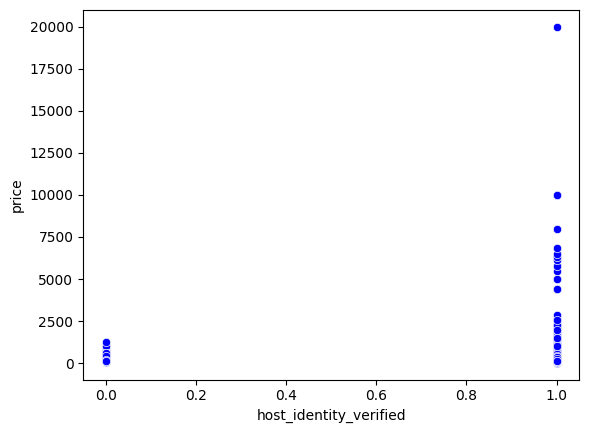

In [66]:
df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

In [67]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model5 = LinearRegression()
model5.fit(X=Vars_Indep, y=Vars_Dep)
model5.score(Vars_Indep,Vars_Dep)

3.7223970964506137e-06

In [68]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model5.predict(X=df[['host_identity_verified']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_identity_verifieds', y_pred)

<Axes: xlabel='host_identity_verified', ylabel='price'>

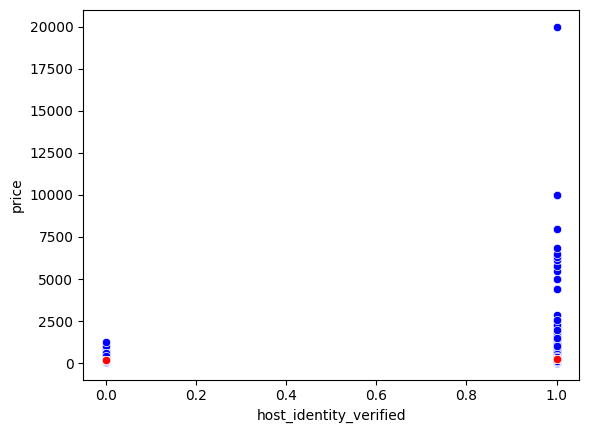

In [69]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_host_identity_verifieds', color="red", data=df)

In [70]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model5.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 3.7223970964506137e-06
Correlación: 0.0019293514704300547


**price vs instant_bookable**

In [71]:
df['instant_bookable']
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].astype(int)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [72]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model6 = LinearRegression()
model6.fit(X=Vars_Indep, y=Vars_Dep)
model6.score(Vars_Indep,Vars_Dep)

3.104471284609556e-05

In [73]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model6.predict(X=df[['instant_bookable']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_instant_bookable', y_pred)

<Axes: xlabel='instant_bookable', ylabel='price'>

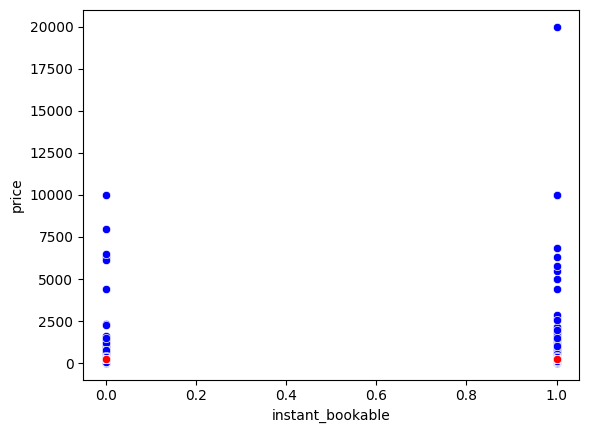

In [74]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_instant_bookable', color="red", data=df)

In [75]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model6.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 3.104471284609556e-05
Correlación: 0.005571778248108548


**Price vs property_type**


<Axes: xlabel='property_type', ylabel='price'>

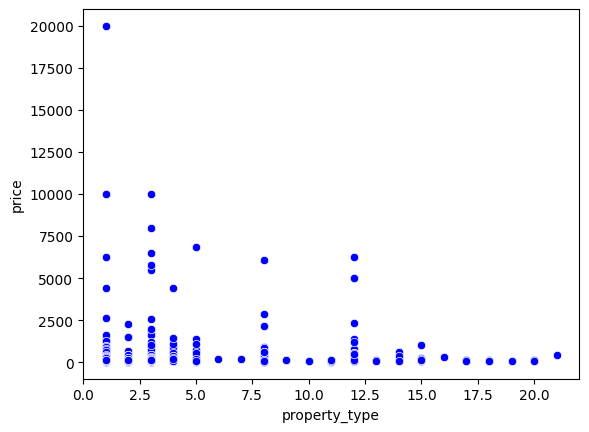

In [76]:
unique_values = df['property_type'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}
df['property_type'] = df['property_type'].map(mapping_dict)
sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [77]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['property_type']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model7 = LinearRegression()
model7.fit(X=Vars_Indep, y=Vars_Dep)
model7.score(Vars_Indep,Vars_Dep)

0.002441251216498852

In [78]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model7.predict(X=df[['property_type']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_property_type', y_pred)

<Axes: xlabel='property_type', ylabel='price'>

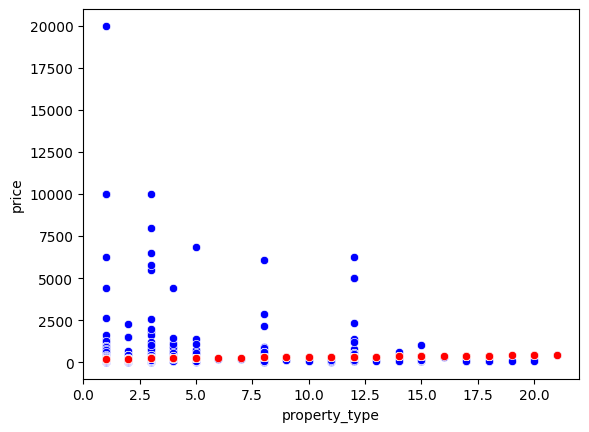

In [79]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color="blue", data=df)
sns.scatterplot(x='property_type', y='Predicciones_property_type', color="red", data=df)

In [80]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model7.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.002441251216498852
Correlación: 0.04940901958649708
